In [1]:
from main import *

## Two - Tetra  $\mu_r = 32$ 

CSG_TwoTetra/al_0.001_mu_32_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/
Opening files from this path =  CSG_TwoTetra/al_0.001_mu_32_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/
6
R [-1.40073928e-12 -1.86801596e-12 -2.16092349e-12] [[ 0.38128109 -0.91710208 -0.11639807]
 [-0.44021928 -0.29083514  0.84948332]
 [ 0.81291556  0.27265125  0.51461596]] 1
Rtilde [1.29292183e-07 1.90090783e-07 2.08176771e-07] [[-0.28930248  0.95672489  0.03132982]
 [ 0.34932031  0.07504497  0.93399335]
 [-0.89122354 -0.28115074  0.35591413]] 1
I [2.37884441e-10 3.25395469e-10 3.71576733e-10] [[-0.35147377  0.93138487 -0.09480723]
 [ 0.42002065  0.24738094  0.87314679]
 [-0.83668921 -0.2670672   0.47814879]] 1
7
R [-3.20099292e-12 -4.26886240e-12 -4.93822604e-12] [[ 0.38127591 -0.91710455 -0.11639553]
 [-0.44021601 -0.29082865  0.84948723]
 [ 0.81291976  0.27264984  0.51461007]] 1
Rtilde [1.29290363e-07 1.90088375e-07 2.08174021e-07] [[-0.28930142  0.95672512  0.03133277]
 [ 0.34931907  0.0750412

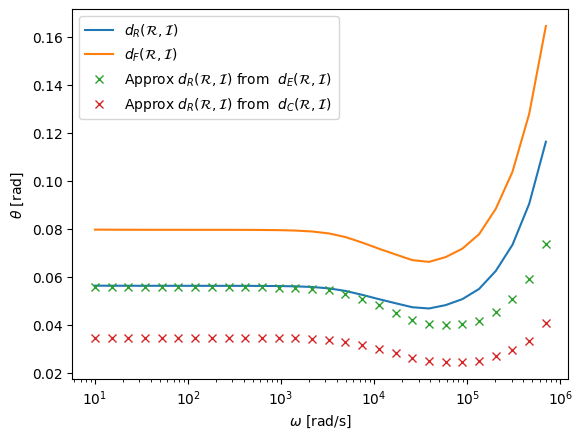

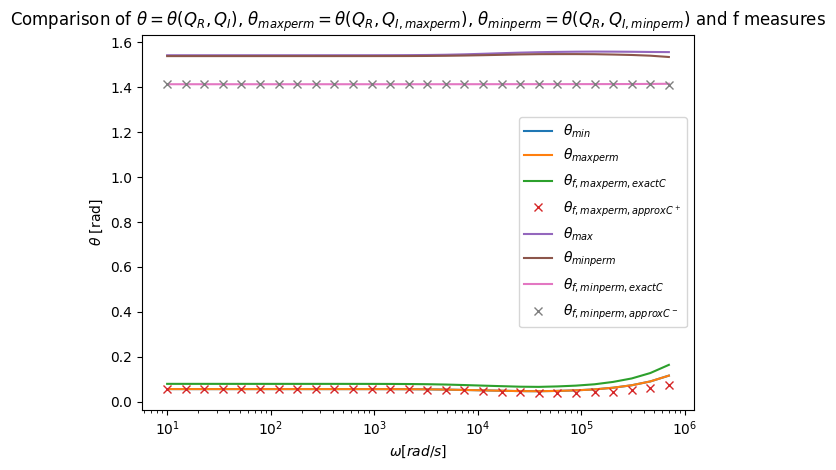

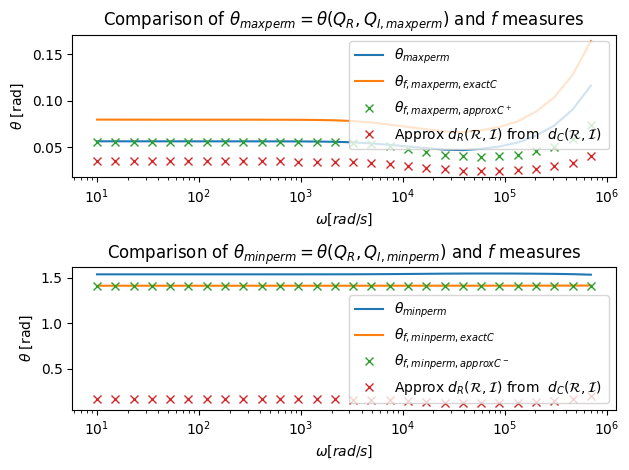

6 1.0
[2.08176771e-07 1.29292183e-07 1.90090783e-07] [3.71576733e-10 3.25395469e-10 2.37884441e-10]
[[-0.03132982 -0.28930248  0.95672489]
 [-0.93399335  0.34932031  0.07504497]
 [-0.35591413 -0.89122354 -0.28115074]] [[ 0.09480723  0.93138487  0.35147377]
 [-0.87314679  0.24738094 -0.42002065]
 [-0.47814879 -0.2670672   0.83668921]]
0.1961276614148726 1.5171655240359756
0.2773663987294313 1.9456566016913655
7 1.0
[1.90088375e-07 1.29290363e-07 2.08174021e-07] [3.59604020e-10 4.91894737e-10 5.61705770e-10]
[[ 0.95672512 -0.28930142  0.03133277]
 [ 0.07504128  0.34931907  0.93399411]
 [-0.28115095 -0.89122437  0.35591187]] [[ 0.35147056  0.93138631 -0.094805  ]
 [-0.42001854  0.24737647  0.87314908]
 [ 0.83669162 -0.26706634  0.47814506]]
0.19612609611626558 1.5171674210866193
0.2773641850629121 1.945658548923201
Computing F measure Tilde


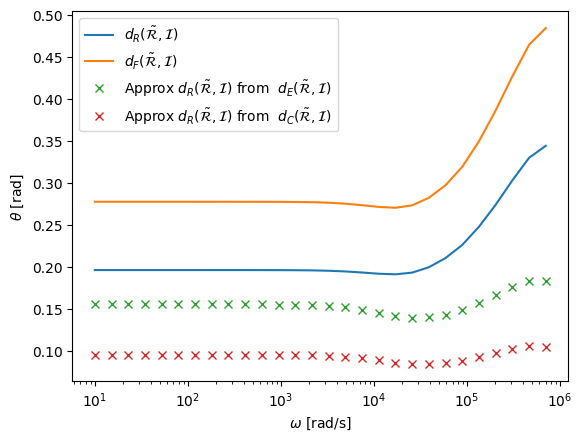

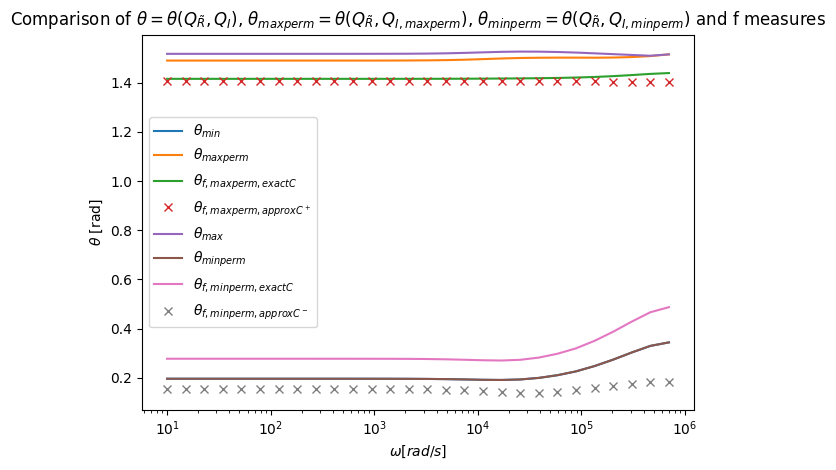

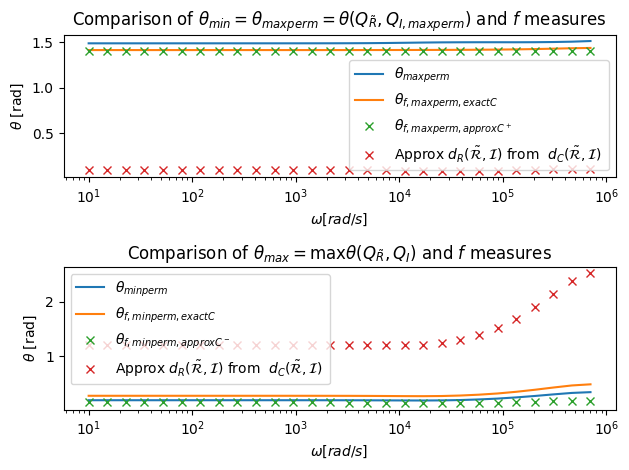

6 1.0
[2.08178911e-07 1.90092657e-07 1.29293599e-07] [3.71576733e-10 2.37884441e-10 3.25395469e-10]
[[ 0.03132752  0.95672471 -0.28930331]
 [ 0.93399276  0.07504784  0.34932127]
 [ 0.35591589 -0.28115057 -0.89122289]] [[-0.09480723  0.35147377  0.93138487]
 [ 0.87314679 -0.42002065  0.24738094]
 [ 0.47814879  0.83668921 -0.2670672 ]]
0.19612460873997836 1.517166170810533
0.2773620815951944 1.9456572655747393
7 1.0
[2.08178911e-07 1.90092657e-07 1.29293599e-07] [5.61705770e-10 3.59604020e-10 4.91894737e-10]
[[ 0.03132752  0.95672471 -0.28930331]
 [ 0.93399276  0.07504784  0.34932127]
 [ 0.35591589 -0.28115057 -0.89122289]] [[-0.094805    0.35147056  0.93138631]
 [ 0.87314908 -0.42001854  0.24737647]
 [ 0.47814506  0.83669162 -0.26706634]]
0.1961191200405133 1.5171688990903074
0.2773543194019711 1.945660066022147


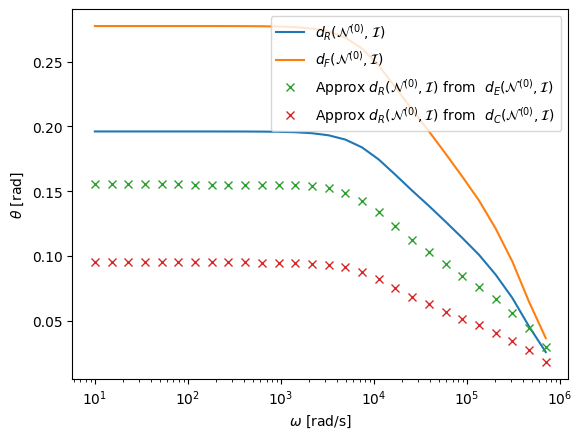

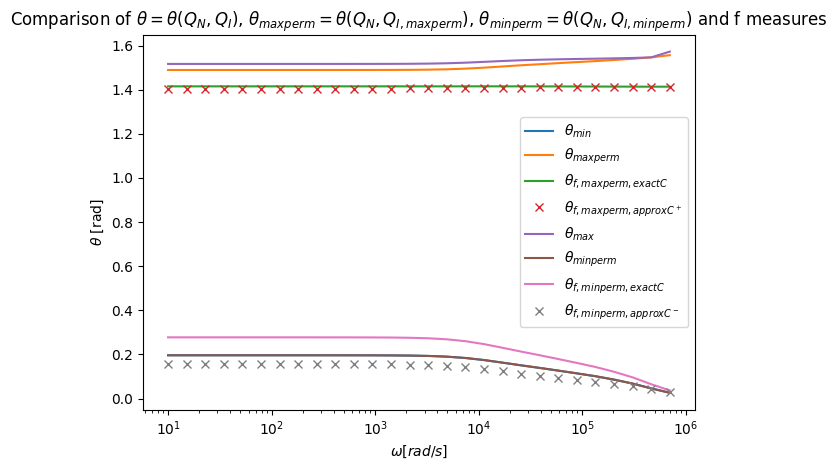

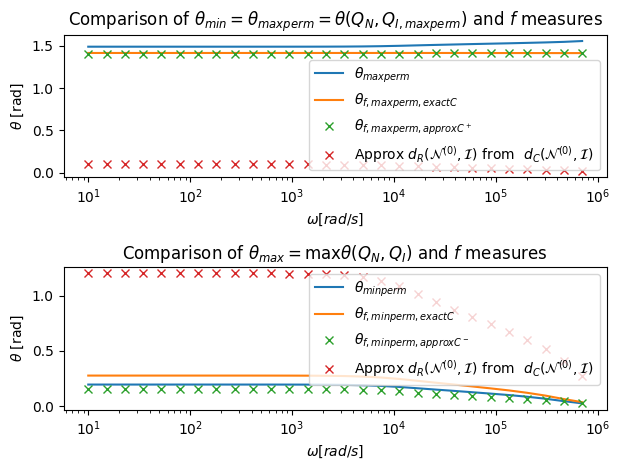

In [2]:
DirList=["CSG_TwoTetra/al_0.001_mu_32_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/"]
SaveRIList=[]
SaveRtilde=[]

MaxOmega=1e6
for directory in DirList:
    print(directory)
    RIResults,RtildeIResults, N0IResults=main(directory,MaxOmega, Figures="On")

dict_keys(['Frequencies', 'MinAnglestoreRI', 'AnglestoreRIfmeasapprxconstsortedmaxdiff_max', 'AnglestoreRIfmeasapprxconstsortedmindiff_min', 'AnglestoreRIfmeasapprxconstsortedmaxdiff_min', 'AnglestoreRIfmeasapprxconstsortedmindiff_max', 'dFMinAnglestoreRI', 'dFMaxAnglestoreRI', 'AnglestoreRIcommeasapprxconstsortedmaxdiff_max', 'AnglestoreRIcommeasapprxconstsortedmindiff_min', 'AnglestoreRIcommeasapprxconstsortedmaxdiff_min', 'AnglestoreRIcommeasapprxconstsortedmindiff_max'])


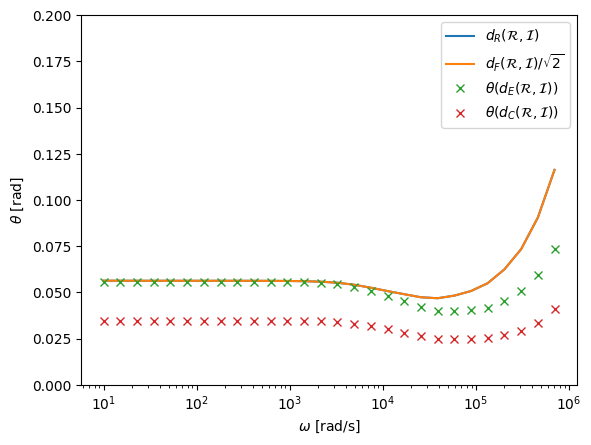

In [3]:
print(RIResults.keys())

Frequencies=RIResults["Frequencies"]
MinAnglestoreRI=RIResults["MinAnglestoreRI"]
AnglestoreRIfmeasapprxconstsortedmaxdiff_max=np.fmin(RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_min"])
AnglestoreRIcommeasapprxconstsortedmaxdiff_max=np.fmin(RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_min"])

dFMinAnglestoreRI = RIResults["dFMinAnglestoreRI"]
fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreRI,label=r'$d_R({\cal R},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreRI/np.sqrt(2),label=r'$d_F({\cal R},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreRIfmeasapprxconstsortedmaxdiff_max,'x',label=r'$\theta(d_E({\cal R},{\cal I}))$ ')
plt.semilogx(Frequencies,AnglestoreRIcommeasapprxconstsortedmaxdiff_max,'x',label=r'$\theta(d_C({\cal R},{\cal I}))$ ')

plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.ylim(0,0.2)
plt.legend()
#plt.savefig("CSG_TwoTetra_dRanddE_metrics_al_0.001_mu_32_sig_1e7_ord3.pdf")
plt.show()

dict_keys(['Frequencies', 'MinAnglestoreRI', 'AnglestoreRIfmeasapprxconstsortedmaxdiff_max', 'AnglestoreRIfmeasapprxconstsortedmindiff_min', 'AnglestoreRIfmeasapprxconstsortedmaxdiff_min', 'AnglestoreRIfmeasapprxconstsortedmindiff_max', 'dFMinAnglestoreRI', 'dFMaxAnglestoreRI', 'AnglestoreRIcommeasapprxconstsortedmaxdiff_max', 'AnglestoreRIcommeasapprxconstsortedmindiff_min', 'AnglestoreRIcommeasapprxconstsortedmaxdiff_min', 'AnglestoreRIcommeasapprxconstsortedmindiff_max'])


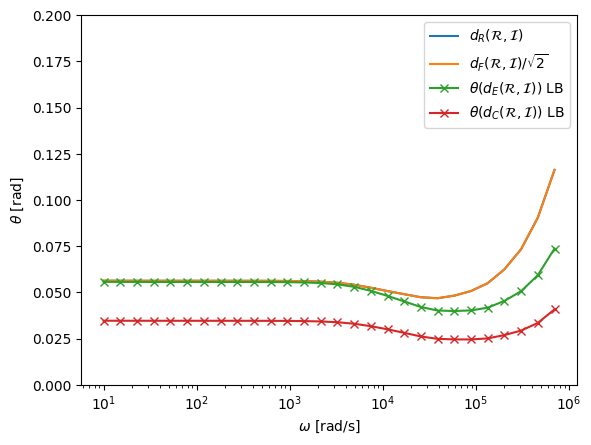

In [4]:

print(RIResults.keys())

Frequencies=RIResults["Frequencies"]
MinAnglestoreRI=RIResults["MinAnglestoreRI"]
AnglestoreRIfmeasapprxconstsortedmaxdiff_max=np.fmin(RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_min"])
AnglestoreRIcommeasapprxconstsortedmaxdiff_max=np.fmin(RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_min"])

AnglestoreRIfmeasupper=np.fmax(RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_min"])
AnglestoreRIfmeaslower=np.fmin(RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_min"])

AnglestoreRIfmeasupper=np.fmax(AnglestoreRIfmeasupper,RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_min"])
AnglestoreRIfmeaslower=np.fmin(AnglestoreRIfmeaslower,RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_min"])
AnglestoreRIfmeasavg=(AnglestoreRIfmeasupper+AnglestoreRIfmeaslower)/2

AnglestoreRIcommmupper=np.fmax(RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_min"])
AnglestoreRIcommmlower=np.fmin(RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_min"])
AnglestoreRIcommmavg = (AnglestoreRIcommmupper+AnglestoreRIcommmlower )/2

AnglestoreRIcommmupper=np.fmax(AnglestoreRIcommmupper,RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_min"])
AnglestoreRIcommmlower=np.fmin(AnglestoreRIcommmlower,RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_min"])
AnglestoreRIcommmavg = (AnglestoreRIcommmupper+AnglestoreRIcommmlower )/2



dFMinAnglestoreRI = RIResults["dFMinAnglestoreRI"]
fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreRI,label=r'$d_R({\cal R},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreRI/np.sqrt(2),label=r'$d_F({\cal R},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreRIfmeaslower,'-x',label=r'$\theta(d_E({\cal R},{\cal I}))$ LB')

plt.semilogx(Frequencies,AnglestoreRIcommmlower,'-x',label=r'$\theta(d_C({\cal R},{\cal I}))$ LB')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.ylim(0,0.2)
plt.legend()
plt.savefig("CSG_TwoTetra_dRanddE_metrics_al_0.001_mu_32_sig_1e7_ord3.pdf")
plt.show()


dict_keys(['Frequencies', 'MinAnglestoreRtildeI', 'AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max', 'AnglestoreRtildeIfmeasapprxconstsortedmindiff_min', 'AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_min', 'AnglestoreRtildeIfmeasapprxconstsortedmindiff_max', 'AnglestoreRtildeIfmeasfullconstsortedmindiff', 'AnglestoreRtildeIfmeasfullconstsortedmaxdiff', 'dFMinAnglestoreRtildeI', 'dFMaxAnglestoreRtildeI', 'AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max', 'AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_min', 'AnglestoreRtildeIcommeasapprxconstsortedmindiff_min', 'AnglestoreRtildeIcommeasapprxconstsortedmindiff_max'])


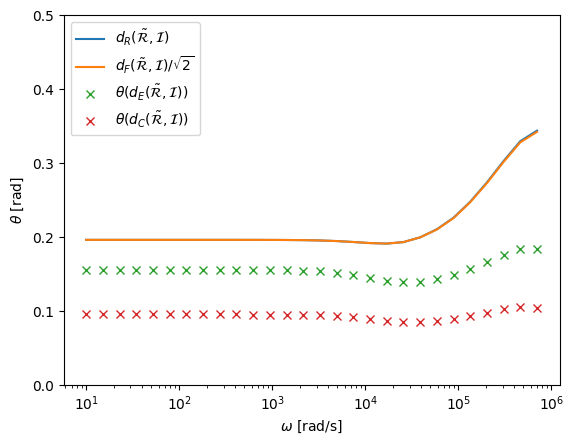

In [5]:
print(RtildeIResults.keys())

Frequencies=RtildeIResults["Frequencies"]
MinAnglestoreRtildeI=RtildeIResults["MinAnglestoreRtildeI"]
AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max=np.fmin(RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_min"])
AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max=np.fmin(RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_min"])

dFMinAnglestoreRtildeI = RtildeIResults["dFMinAnglestoreRtildeI"]
fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreRtildeI,label=r'$d_R(\tilde{\cal R},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreRtildeI/np.sqrt(2),label=r'$d_F(\tilde{\cal R},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max,'x',label=r'$\theta(d_E(\tilde{\cal R},{\cal I}))$ ')
plt.semilogx(Frequencies,AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max,'x',label=r'$\theta(d_C(\tilde{\cal R},{\cal I}))$ ')

plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.ylim(0,0.5)
plt.legend()
#plt.savefig("CSG_TwoTetra_dRanddE_metrics_tilde_al_0.001_mu_32_sig_1e7_ord3.pdf")
plt.show()

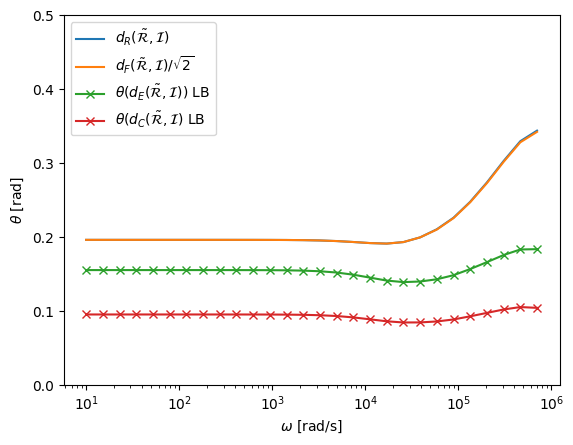

In [6]:

Frequencies=RtildeIResults["Frequencies"]
MinAnglestoreRtildeI=RtildeIResults["MinAnglestoreRtildeI"]
#AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max=RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max"]
dFMinAnglestoreRtildeI = RtildeIResults["dFMinAnglestoreRtildeI"]
#AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max=np.fmin(RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_min"])
AnglestoreRtildeIfmeasupper=np.fmax(RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_max"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_min"])
AnglestoreRtildeIfmeaslower=np.fmin(RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_max"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_min"])

AnglestoreRtildeIfmeasupper=np.fmax(AnglestoreRtildeIfmeasupper,RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_min"])
AnglestoreRtildeIfmeaslower=np.fmin(AnglestoreRtildeIfmeaslower,RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_min"])

AnglestoreRtildeIfmeasavg=(AnglestoreRtildeIfmeasupper+AnglestoreRtildeIfmeaslower)/2

AnglestoreRtildeIfmeasfullconstsortedmindiff= RtildeIResults["AnglestoreRtildeIfmeasfullconstsortedmindiff"]

AnglestoreRtildeIcommmupper=np.fmax(RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_min"])
AnglestoreRtildeIcommmlower=np.fmin(RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_min"])

AnglestoreRtildeIcommmupper=np.fmax(AnglestoreRtildeIcommmupper,RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_min"])
AnglestoreRtildeIcommmlower=np.fmin(AnglestoreRtildeIcommmlower,RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_min"])


AnglestoreRtildeIcommmavg = (AnglestoreRtildeIcommmupper+AnglestoreRtildeIcommmlower )/2

AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max=np.fmin(RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_min"])

fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreRtildeI,label=r'$d_R(\tilde{\cal R},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreRtildeI/np.sqrt(2),label=r'$d_F(\tilde{\cal R},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreRtildeIfmeaslower,'-x',label=r'$\theta(d_E(\tilde{\cal R},{\cal I}))$ LB')
plt.semilogx(Frequencies,AnglestoreRtildeIcommmlower,'-x',label=r'$\theta(d_C(\tilde{\cal R},{\cal I})$ LB ')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.ylim(0,0.5)
plt.legend()
plt.savefig("CSG_TwoTetra_dRanddE_metrics_tilde_al_0.001_mu_32_sig_1e7_ord3.pdf")
plt.show()

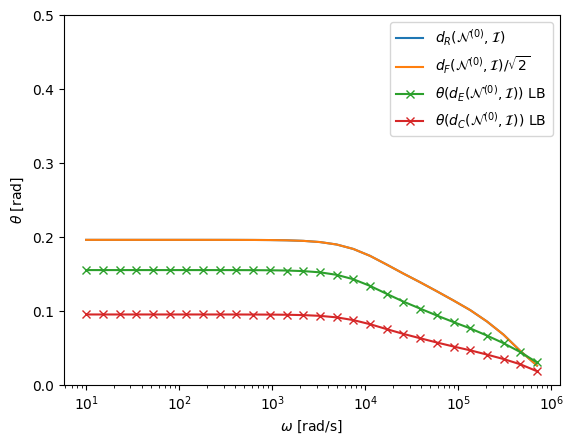

In [5]:

Frequencies=N0IResults["Frequencies"]
MinAnglestoreN0I=N0IResults["MinAnglestoreN0I"]
AnglestoreN0Ifmeasapprxconstsortedmaxdiff_max=np.fmin(N0IResults["AnglestoreN0Ifmeasapprxconstsortedmaxdiff_max"],N0IResults["AnglestoreN0Ifmeasapprxconstsortedmindiff_min"])
AnglestoreN0Icommeasapprxconstsortedmaxdiff_max=np.fmin(N0IResults["AnglestoreN0Icommeasapprxconstsortedmaxdiff_max"],N0IResults["AnglestoreN0Icommeasapprxconstsortedmindiff_min"])

dFMinAnglestoreN0I = N0IResults["dFMinAnglestoreN0I"]
fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreN0I,label=r'$d_R({\cal N}^{(0)},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreN0I/np.sqrt(2),label=r'$d_F({\cal N}^{(0)},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreN0Ifmeasapprxconstsortedmaxdiff_max,'x-',label=r'$\theta(d_E({\cal N}^{(0)},{\cal I}))$ LB')
plt.semilogx(Frequencies,AnglestoreN0Icommeasapprxconstsortedmaxdiff_max,'x-',label=r'$\theta(d_C({\cal N}^{(0)},{\cal I}))$ LB ')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.ylim(0,0.5)
plt.legend()
plt.savefig("CSG_TwoTetra_dRanddE_metrics_N0_al_0.001_mu_32_sig_1e7_ord3.pdf")
plt.show()

In [7]:
## Loop over different Permeabilities and compare results

DirList=["CSG_TwoTetra/al_0.001_mu_1_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/",
         "CSG_TwoTetra/al_0.001_mu_2_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/",
         "CSG_TwoTetra/al_0.001_mu_8_sig_1e7/1e1-1e8_40_el_25014_ord_3_POD_13_1e-7/Data/",
         "CSG_TwoTetra/al_0.001_mu_16_sig_1e7/1e1-1e8_40_el_25014_ord_3_POD_13_1e-7/Data/",
         "CSG_TwoTetra/al_0.001_mu_32_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/",
         "CSG_TwoTetra/al_0.001_mu_64_sig_1e7/1e1-1e8_40_el_25014_ord_3_POD_13_1e-7/Data/",
         "CSG_TwoTetra/al_0.001_mu_128_sig_1e7/1e1-1e8_40_el_25014_ord_3_POD_13_1e-7/Data/"]

murlist=[1,2,8,16,32,64,128]
Nresults=len(Frequencies)
Results=np.zeros((7,Nresults))
TildeResults=np.zeros((7,Nresults))
N0Results=np.zeros((7,Nresults))


dRresults=np.zeros((7,Nresults))
dRTilderesults=np.zeros((7,Nresults))
dRN0results=np.zeros((7,Nresults))

dFresults=np.zeros((7,Nresults))
dFTilderesults=np.zeros((7,Nresults))
dFN0results=np.zeros((7,Nresults))

dCresults=np.zeros((7,Nresults))
dCTilderesults=np.zeros((7,Nresults))
dCN0results=np.zeros((7,Nresults))


In [8]:
MaxOmega=1e6
count=0
for directory in DirList:
    print(directory)
    RIResults,RtildeIResults,N0IResults=main(directory,MaxOmega,Figures="Off")
    
    AnglestoreRIfmeasapprxconstsortedmaxdiff_max=np.fmin(RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_min"])
    Results[count,:] =AnglestoreRIfmeasapprxconstsortedmaxdiff_max
    
    AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max=np.fmin(RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_min"])
    TildeResults[count,:] =AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max
    
    AnglestoreN0Ifmeasapprxconstsortedmaxdiff_max=np.fmin(N0IResults["AnglestoreN0Ifmeasapprxconstsortedmaxdiff_max"],N0IResults["AnglestoreN0Ifmeasapprxconstsortedmindiff_min"])
    N0Results[count,:] =AnglestoreN0Ifmeasapprxconstsortedmaxdiff_max
    
    
    dRresults[count,:] = RIResults["MinAnglestoreRI"]
    dFresults[count,:] = RIResults["dFMinAnglestoreRI"]
    dCresults[count,:] = np.fmin(RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_min"])
    
    dRTilderesults[count,:] = RtildeIResults["MinAnglestoreRtildeI"]
    dFTilderesults[count,:] = RtildeIResults["dFMinAnglestoreRtildeI"]
    dCTilderesults[count,:] = np.fmin(RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_min"])

    dRN0results[count,:] = N0IResults["MinAnglestoreN0I"]
    dFN0results[count,:] = N0IResults["dFMinAnglestoreN0I"]
    dCN0results[count,:] = np.fmin(N0IResults["AnglestoreN0Icommeasapprxconstsortedmaxdiff_max"],N0IResults["AnglestoreN0Icommeasapprxconstsortedmindiff_min"])
    
        
    count+=1
Frequencies=RtildeIResults["Frequencies"]


CSG_TwoTetra/al_0.001_mu_1_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/
Opening files from this path =  CSG_TwoTetra/al_0.001_mu_1_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/
Computing F measure Tilde
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for 

/Users/paulledger/Coding/Rodrigues_Angles/src/StableAngle.py:10: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos((np.trace(Q)-1.)/2.)


error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0
error different multiplicties for R and I 3.0 1.0


/Users/paulledger/Coding/Rodrigues_Angles/src/Fmeasure.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  Fexactconst[n] = np.abs(np.linalg.norm(R-I,ord='fro')**2 - diffeig) / np.abs(normalisation)
/Users/paulledger/Coding/Rodrigues_Angles/src/Fmeasure.py:30: RuntimeWarning: invalid value encountered in scalar divide
  Fexactconst[n] = np.abs(np.linalg.norm(R-I,ord='fro')**2 - diffeig) / np.abs(normalisation)
/Users/paulledger/Coding/Rodrigues_Angles/src/Commeasure.py:36: RuntimeWarning: invalid value encountered in scalar divide
  Comexactconst[n] = np.abs(np.linalg.norm(Z,ord='fro')**2 ) / np.abs(normalisation)
/Users/paulledger/Coding/Rodrigues_Angles/src/Commeasure.py:66: RuntimeWarning: invalid value encountered in scalar divide
  Comapproxconst_min[n] = np.abs(np.linalg.norm(Z,ord='fro')**2 ) / np.abs(normalisation_min)
/Users/paulledger/Coding/Rodrigues_Angles/src/Commeasure.py:67: RuntimeWarning: invalid value encountered in scalar divide
  Comapproxconst_max[

-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
CSG_TwoTetra/al_0.001_mu_2_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/
Opening files from this path =  CSG_TwoTetra/al_0.001_mu_2_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/
Computing F measure Tilde
CSG_TwoTetra/al_0.001_mu_8_sig_1e7/1e1-1e8_40_el_25014_ord_3_POD_13_1e-7/Data/
Opening files from this path =  CSG_TwoTetra/al_0.001_mu_8_sig_1e7/1e1-1e8_40_el_25014_ord_3_POD_13_1e-7/Data/
Computing F measure Tilde
CSG_TwoT

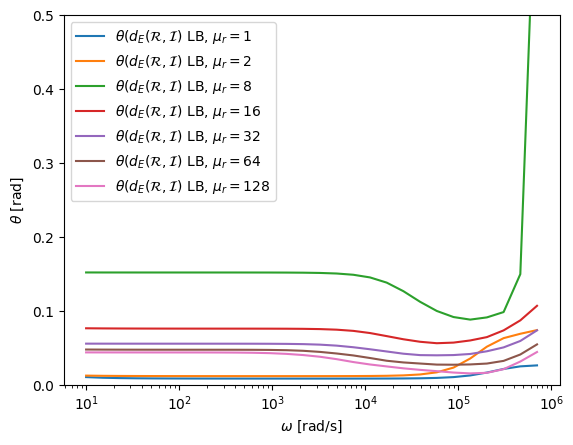

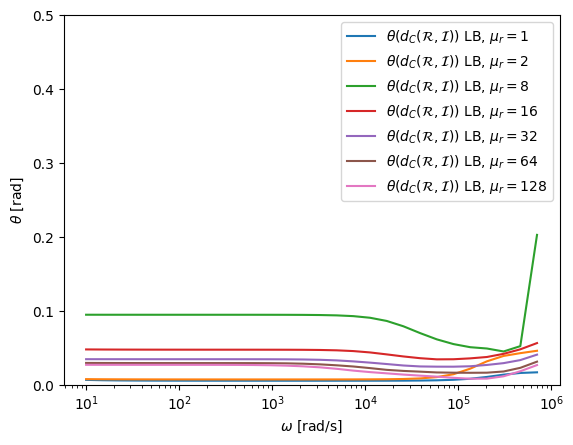

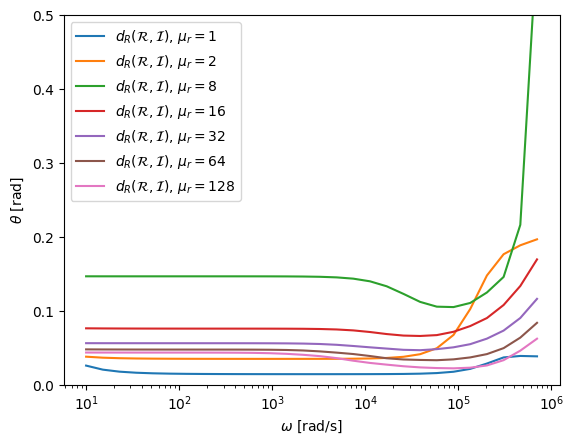

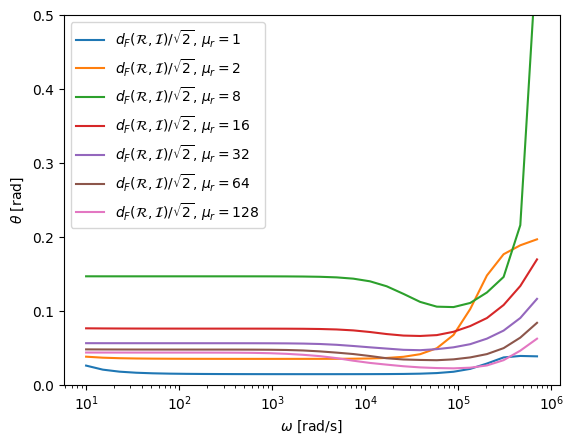

In [9]:
fig=plt.figure()
for count in range(7):
    plt.semilogx(Frequencies,Results[count,:],label=r'$\theta(d_E({\cal R},{\cal I})$ LB, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,0.5)
plt.savefig("CSG_TwoTetra_apprxdR_metrics_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()

fig=plt.figure()
for count in range(7):
    plt.semilogx(Frequencies,dCresults[count,:],label=r'$\theta(d_C({\cal R},{\cal I}))$ LB, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,0.5)
plt.savefig("CSG_TwoTetra_apprxdR_metricsdC_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()

fig=plt.figure()
for count in range(7):
    plt.semilogx(Frequencies,dRresults[count,:],label=r'$d_R({\cal R},{\cal I})$, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,0.5)
plt.savefig("CSG_TwoTetra_dR_metrics_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()


fig=plt.figure()
for count in range(7):
    plt.semilogx(Frequencies,dFresults[count,:]/np.sqrt(2),label=r'$d_F({\cal R},{\cal I})/\sqrt{2}$, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,0.5)
plt.savefig("CSG_TwoTetra_dF_metrics_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()



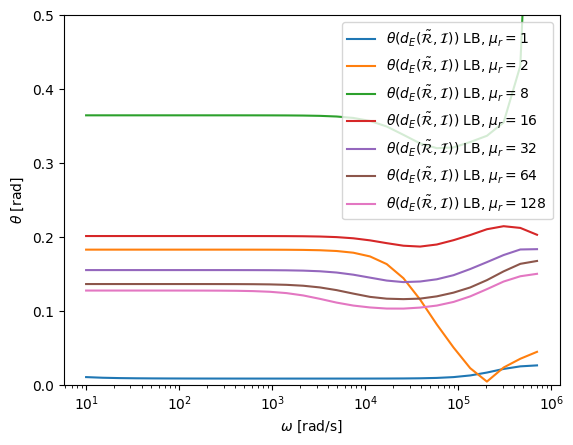

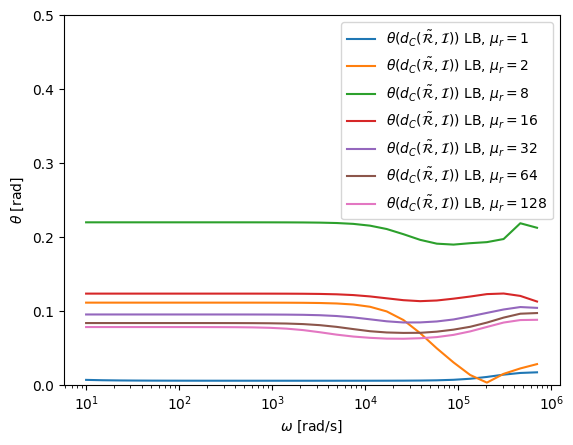

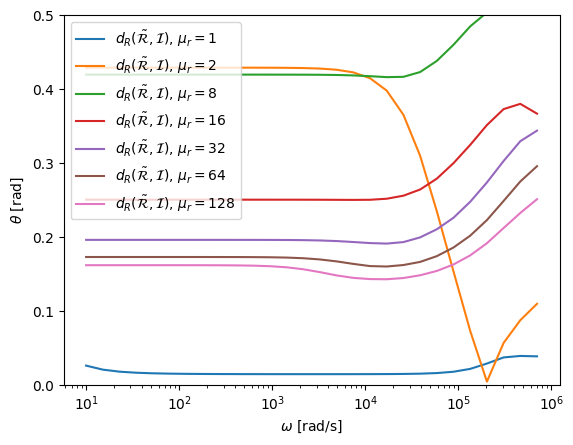

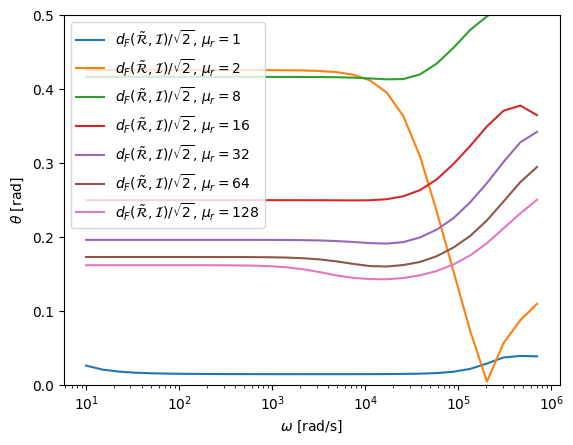

In [10]:
fig=plt.figure()
for count in range(7):
    plt.semilogx(Frequencies,TildeResults[count,:],label=r'$\theta(d_E(\tilde{\cal R},{\cal I}))$ LB, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,0.5)
plt.savefig("CSG_TwoTetra_apprxdR_metrics_tilde_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()

fig=plt.figure()
for count in range(7):
    plt.semilogx(Frequencies,dCTilderesults[count,:],label=r'$\theta(d_C(\tilde{\cal R},{\cal I}))$ LB, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,0.5)
plt.savefig("CSG_TwoTetra_apprxdR_metricsdC_tilde_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()


fig=plt.figure()
for count in range(7):
    plt.semilogx(Frequencies,dRTilderesults[count,:],label=r'$d_R(\tilde{\cal R},{\cal I})$, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,0.5)
plt.savefig("CSG_TwoTetra_dR_metrics_tilde_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()

fig=plt.figure()
for count in range(7):
    plt.semilogx(Frequencies,dFTilderesults[count,:]/np.sqrt(2),label=r'$d_F(\tilde{\cal R},{\cal I})/\sqrt{2}$, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,0.5)
plt.savefig("CSG_TwoTetra_dF_metrics_tilde_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()

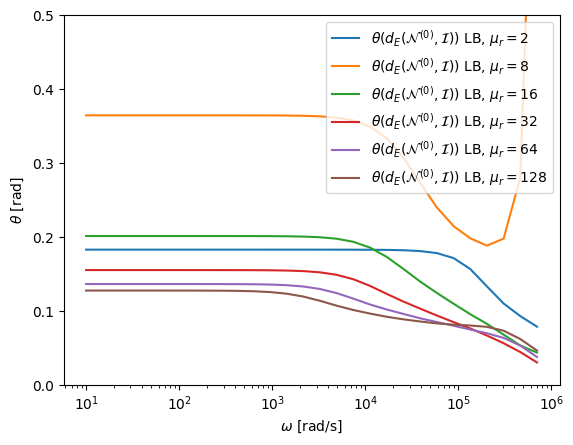

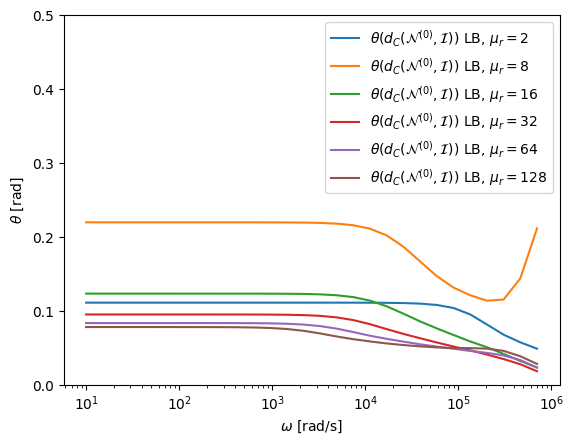

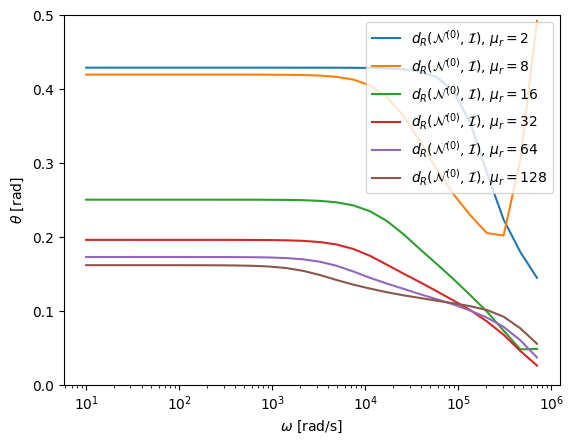

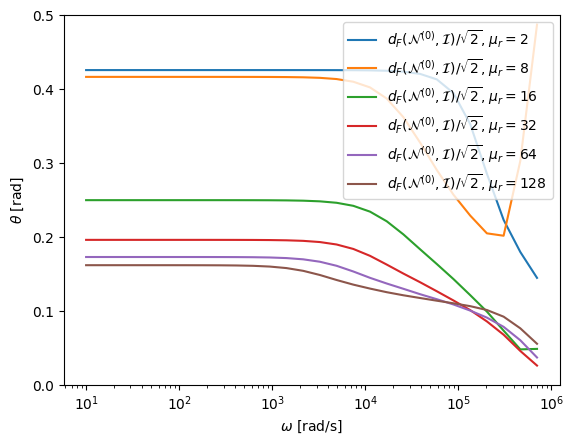

In [12]:
fig=plt.figure()
for count in range(1,7):
    plt.semilogx(Frequencies,N0Results[count,:],label=r'$\theta(d_E({\cal N}^{(0)},{\cal I}))$ LB, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,0.5)
plt.savefig("CSG_TwoTetra_apprxdR_metrics_N0_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()

fig=plt.figure()
for count in range(1,7):
    plt.semilogx(Frequencies,dCN0results[count,:],label=r'$\theta(d_C({\cal N}^{(0)},{\cal I}))$ LB, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,0.5)
plt.savefig("CSG_TwoTetra_apprxdR_metricsdC_N0_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()


fig=plt.figure()
for count in range(1,7):
    plt.semilogx(Frequencies,dRN0results[count,:],label=r'$d_R({\cal N}^{(0)},{\cal I})$, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,0.5)
plt.savefig("CSG_TwoTetra_dR_metrics_N0_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()

fig=plt.figure()
for count in range(1,7):
    plt.semilogx(Frequencies,dFN0results[count,:]/np.sqrt(2),label=r'$d_F({\cal N}^{(0)},{\cal I})/\sqrt{2}$, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,0.5)
plt.savefig("CSG_TwoTetra_dF_metrics_N0_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()